## Xử lý và hiển thị dữ liệu

Chúng ta sẽ dự đoán một giá trị từ các đặc điểm khác trong dataset. Ví dụ: Dự đoán Calories_Burned dựa trên các yếu tố như Age, Weight, Height, Max_BPM,....

In [3]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Đọc file CSV
file_path = './gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)

# Hiển thị thông tin dataset
print("Dataset Overview:")
print(data.head())
print("\nThông tin dữ liệu:")
print(data.info())


Dataset Overview:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level 

## Xử lý dữ liệu

Kiểm tra giá trị thiếu, chuẩn hóa các cột nếu cần, và chuyển dữ liệu không số (categorical) sang số.

In [5]:
# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())

# Điền giá trị thiếu
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(exclude=['number']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Chuyển đổi dữ liệu không số
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Workout_Type'] = data['Workout_Type'].astype('category').cat.codes  # Chuyển đổi thành số

print("\nDữ liệu sau khi xử lý:")
print(data.head())




Số lượng giá trị thiếu trong mỗi cột:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Dữ liệu sau khi xử lý:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       0         88.3        1.71      180      157           60   
1   46       1         74.9        1.53      179      151           66   
2   32       1         68.1        1.66      167      122           54   
3   25       0         53.2        1.70      190      164           56   
4   38       0         46.1  

<ipython-input-5-afc6d2d622e7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


## Chọn các đặc trưng (features) và mục tiêu (target)
Ở đây, chúng ta sẽ sử dụng Linear Regression để dự đoán Calories_Burned.

In [7]:
# Chọn các cột làm đặc trưng (features) và mục tiêu (target)
features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
            'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
            'Water_Intake (liters)', 'Workout_Frequency (days/week)',
            'Experience_Level', 'BMI']

target = 'Calories_Burned'

# Tách dữ liệu thành X (đặc trưng) và y (mục tiêu)
X = data[features]
y = data[target]


## Chia dữ liệu thành tập huấn luyện và kiểm tra
Chia dữ liệu để huấn luyện và đánh giá mô hình.

In [8]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Số lượng mẫu trong tập huấn luyện: {len(X_train)}")
print(f"Số lượng mẫu trong tập kiểm tra: {len(X_test)}")


Số lượng mẫu trong tập huấn luyện: 778
Số lượng mẫu trong tập kiểm tra: 195


## Xây dựng mô hình Linear Regression
Huấn luyện mô hình và kiểm tra hiệu suất.

In [9]:
# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


## Đánh giá mô hình
Sử dụng các chỉ số như MSE (Mean Squared Error) và R² Score để đánh giá.

Mean Squared Error (MSE): 2159.420230952632
R² Score: 0.9741154382110169


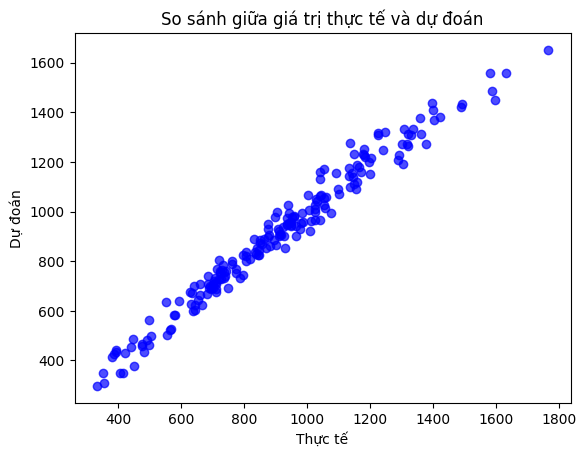

In [10]:
# Tính toán MSE và R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# So sánh giá trị dự đoán với giá trị thực tế
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.title("So sánh giữa giá trị thực tế và dự đoán")
plt.show()


## Phân tích Residuals (Số dư dự đoán)
Residuals là sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Một mô hình tốt sẽ có residuals phân phối ngẫu nhiên, không có mô hình rõ ràng.

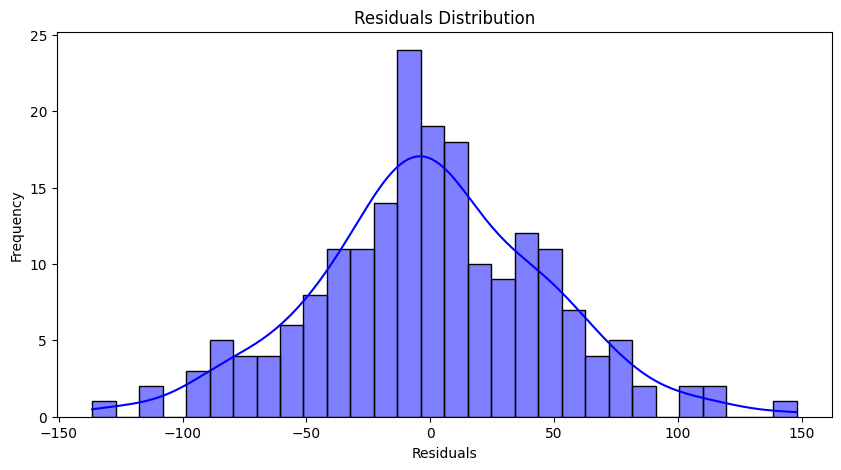

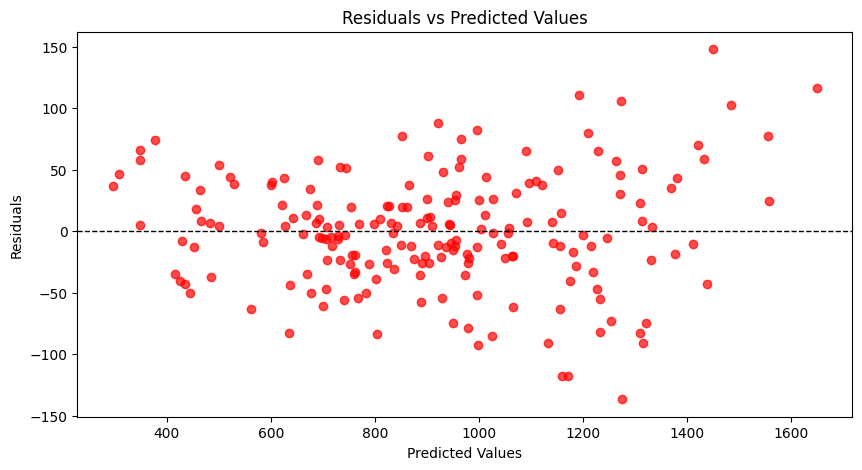

In [11]:
# Tính residuals
residuals = y_test - y_pred

# Biểu đồ phân phối residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Biểu đồ scatter: Giá trị dự đoán vs residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


## Cross-validation
Thay vì chỉ chia một lần thành tập huấn luyện và kiểm tra, cross-validation sẽ chia dữ liệu thành nhiều phần để kiểm tra độ ổn định của mô hình.

In [12]:
from sklearn.model_selection import cross_val_score

# Sử dụng cross-validation với scoring là R²
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores)}")


Cross-Validation R² Scores: [0.9722963  0.96945935 0.97295473 0.9720636  0.96898262]
Mean R² Score: 0.97115132022017
Standard Deviation of R² Scores: 0.001610066406042177


## Kiểm tra ảnh hưởng của từng đặc trưng
Hệ số (coefficients) của mô hình Linear Regression cho thấy ảnh hưởng của từng đặc trưng đến biến mục tiêu.

<ipython-input-13-f22ef88b02aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


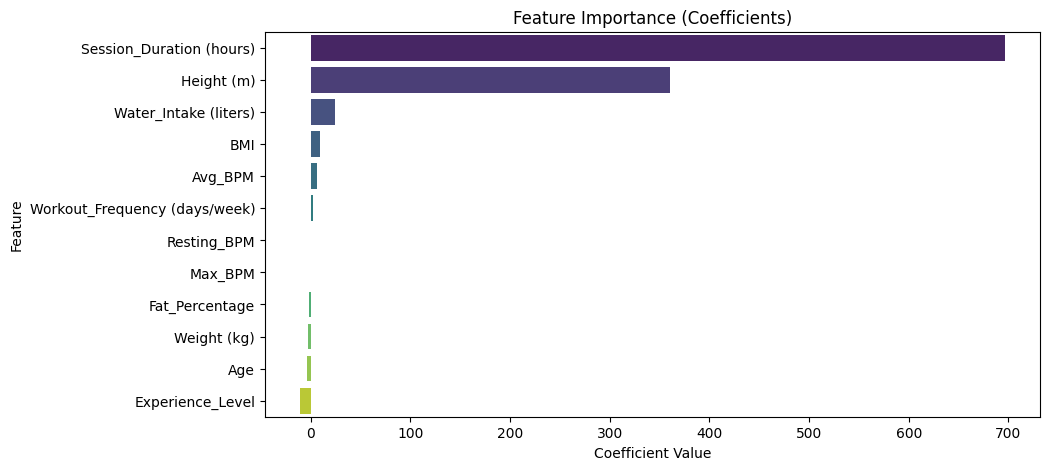

In [13]:
# Lấy hệ số từ mô hình
features = X.columns  # Danh sách các đặc trưng (columns của X)
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Hiển thị hệ số
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
